# Algoritmi Avanzati, 05.03.2019

### EXERCISE 7
Given the iris dataset CSV file and a new unseen vector representing a flower, define a function that classifies the new flower using its k-nearest neighbors. Apply the algorithm using $k \in \{5,10,20\}$ and print the label of the results.

Also, create 2-dimensional scatter plots of the iris dataset considering the given pairs of dimensions, and draw the points of each class with a different color. Take a look at the plots and answer the following question: if you could use only one of the given pairs to apply k-nearest neighbors, which pair would you use?

Pairs:
  - SepalLength vs SepalWidth
  - PetalLength vs PetalWidth
  - PetalLength vs SepalLength
  - PetalWidth vs SepalWidth

In [1]:
import pandas as pd
import numpy as np

iris = pd.read_csv("Datasets/iris.data", names=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Label"])
new_flower = [5.8, 3.0, 4.9, 1.6]

#### KNN with $k \in \{5,10,20\}$

In [2]:
distances = []

for i, f in iris.iterrows():
    tmp = [(new_flower[i] - f[i])**2 for i in range(4)]
    dist = np.sqrt(sum(tmp))
    distances.append((dist, f[4]))

distances.sort(key=lambda x: x[0])


def knn(neighbors):
    counts = {}
    
    for d, l in neighbors: # (distance, label)
        if l not in counts:
            counts[l] = 1
        else:
            counts[l] += 1
        
    return max(counts.items(), key=lambda x: x[1])[0]


print("KNN  5:", knn(distances[:5]))
print("KNN 10:", knn(distances[:10]))
print("KNN 20:", knn(distances[:20]))


KNN  5: Iris-virginica
KNN 10: Iris-virginica
KNN 20: Iris-versicolor


#### Plots

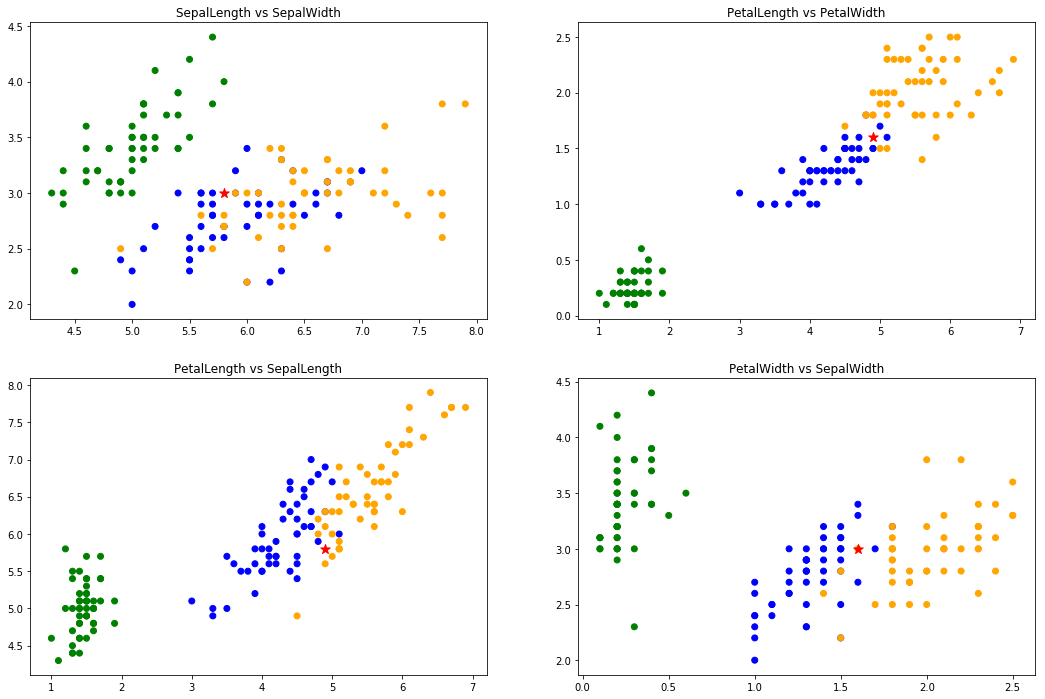

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

col_map = {'Iris-virginica': 'orange', 'Iris-versicolor': 'blue', 'Iris-setosa': 'green'}
colors = [col_map[l] for l in iris['Label']]

axes[0][0].set_title("SepalLength vs SepalWidth")
axes[0][0].scatter(iris['SepalLength'], iris['SepalWidth'], color=colors)
axes[0][0].scatter(new_flower[0], new_flower[1], color='red', s=100, marker='*')

axes[0][1].set_title("PetalLength vs PetalWidth")
axes[0][1].scatter(iris['PetalLength'], iris['PetalWidth'], color=colors)
axes[0][1].scatter(new_flower[2], new_flower[3], color='red', s=100, marker='*')

axes[1][0].set_title("PetalLength vs SepalLength")
axes[1][0].scatter(iris['PetalLength'], iris['SepalLength'], color=colors)
axes[1][0].scatter(new_flower[2], new_flower[0], color='red', s=100, marker='*')

axes[1][1].set_title("PetalWidth vs SepalWidth")
axes[1][1].scatter(iris['PetalWidth'], iris['SepalWidth'], color=colors)
axes[1][1].scatter(new_flower[3], new_flower[1], color='red', s=100, marker='*')